In [70]:
# Install required packages
# Use pip to install packages in Python
!pip install pandas
!pip install rpy2

# **Part 1: Importing the Dataset (2 Marks)**

In [71]:
# Import the pandas library
import pandas

In [72]:
# Load dataset from GitHub
# Corrected URL for raw data access on GitHub
url = "https://raw.githubusercontent.com/Ultrawebs/greenfuture-analysis/refs/heads/main/greenfuture_ideas_dataset.csv"
# Use pandas.read_csv to load data from a URL
data = pandas.read_csv(url)

# Preview the dataset
# Use the head() method of a pandas DataFrame to preview the data
print(data.head())

  Employee ID Office Location            Department Idea Submission Date  \
0    587b45d8         Germany      Renewable Energy           16/04/2024   
1    0d3e8b8e          Canada      Renewable Energy           14/01/2024   
2    fa012fe7          France  Environmental Policy           10/01/2025   
3    cb8ed680           Japan            Technology           24/12/2023   
4    333fff26       Australia            Technology           13/02/2025   

  Idea Title          Idea Category  Number of Votes Collaboration Status  \
0     Idea 1  Sustainable Transport              231   Single Contributor   
1     Idea 2       Water Management              477  Cross-Regional Team   
2     Idea 3       Renewable Energy               48  Cross-Regional Team   
3     Idea 4       Circular Economy              330  Cross-Regional Team   
4     Idea 5       Circular Economy              428   Single Contributor   

  Approval Status Implementation Status Security Concern Flag  
0         Pendin

# **Part 2: SQL Operations in R (3 Marks)**



    
## 2.1 Install & load required packages

In [73]:
# Load the rpy2 extension to enable R code execution
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [74]:
# Use %%R to indicate this cell should be executed as R code
%%R
install.packages("sqldf")
library(sqldf)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/sqldf_0.4-11.tar.gz'
Content type 'application/x-gzip' length 63097 bytes (61 KB)
downloaded 61 KB


The downloaded source packages are in
	‘/tmp/RtmpMO56HE/downloaded_packages’


##    2.2 SQL Statements: SELECT, INSERT, UPDATE, DELETE

In [75]:
# Use %%R to indicate this cell should be executed as R code
# Use -i data to import the 'data' variable from the Python environment into R
%%R -i data

# Load required library
library(sqldf)

# SELECT: Display first 5 rows from 'data'
sqldf("SELECT * FROM data LIMIT 5")

  Employee ID Office Location           Department Idea Submission Date
1    587b45d8         Germany     Renewable Energy           16/04/2024
2    0d3e8b8e          Canada     Renewable Energy           14/01/2024
3    fa012fe7          France Environmental Policy           10/01/2025
4    cb8ed680           Japan           Technology           24/12/2023
5    333fff26       Australia           Technology           13/02/2025
  Idea Title         Idea Category Number of Votes Collaboration Status
1     Idea 1 Sustainable Transport             231   Single Contributor
2     Idea 2      Water Management             477  Cross-Regional Team
3     Idea 3      Renewable Energy              48  Cross-Regional Team
4     Idea 4      Circular Economy             330  Cross-Regional Team
5     Idea 5      Circular Economy             428   Single Contributor
  Approval Status Implementation Status Security Concern Flag
1         Pending           Not Started                    No
2        App

In [76]:
# INSERT (create a temporary table and insert new row)
# Use %%R to indicate this cell should be executed as R code
# Use -i data to import the 'data' variable from the Python environment into R
# Add -o temp_data to export the 'temp_data' variable from R back to Python
%%R -i data -o temp_data

# Create a temporary table with the first 5 rows from 'data'
temp_data <- data[1:5, ]

# Insert a new row into temp_data
temp_data <- rbind(temp_data, c("E4001", "Delhi", "R&D", "20/04/2025", "Green Roof", "Urban Dev", 12, "Yes", "Pending", "No", "No"))

# Print the updated temporary data frame (optional, for verification)
print(temp_data)

  Employee ID Office Location           Department Idea Submission Date
0    587b45d8         Germany     Renewable Energy           16/04/2024
1    0d3e8b8e          Canada     Renewable Energy           14/01/2024
2    fa012fe7          France Environmental Policy           10/01/2025
3    cb8ed680           Japan           Technology           24/12/2023
4    333fff26       Australia           Technology           13/02/2025
6       E4001           Delhi                  R&D           20/04/2025
  Idea Title         Idea Category Number of Votes Collaboration Status
0     Idea 1 Sustainable Transport             231   Single Contributor
1     Idea 2      Water Management             477  Cross-Regional Team
2     Idea 3      Renewable Energy              48  Cross-Regional Team
3     Idea 4      Circular Economy             330  Cross-Regional Team
4     Idea 5      Circular Economy             428   Single Contributor
6 Green Roof             Urban Dev              12              

In [77]:
# This is the cell for the UPDATE operation
# Use %%R to indicate this cell should be executed as R code
# Use -i temp_data to import the 'temp_data' variable from the Python environment into R (exported in the previous cell)
# Use -o temp_data to export the modified 'temp_data' back to the Python environment if needed later
%%R -i temp_data -o temp_data

# UPDATE the temporary data frame in R
# Assuming the inserted row is now the 6th row
if (nrow(temp_data) >= 6) {
    temp_data[6, "Approval.Status"] <- "Approved"
} else {
    print("Error: Row 6 does not exist in temp_data for update.")
}

# Print the updated temporary data frame (optional, for verification)
print(temp_data)

  Employee ID Office Location           Department Idea Submission Date
0    587b45d8         Germany     Renewable Energy           16/04/2024
1    0d3e8b8e          Canada     Renewable Energy           14/01/2024
2    fa012fe7          France Environmental Policy           10/01/2025
3    cb8ed680           Japan           Technology           24/12/2023
4    333fff26       Australia           Technology           13/02/2025
6       E4001           Delhi                  R&D           20/04/2025
  Idea Title         Idea Category Number of Votes Collaboration Status
0     Idea 1 Sustainable Transport             231   Single Contributor
1     Idea 2      Water Management             477  Cross-Regional Team
2     Idea 3      Renewable Energy              48  Cross-Regional Team
3     Idea 4      Circular Economy             330  Cross-Regional Team
4     Idea 5      Circular Economy             428   Single Contributor
6 Green Roof             Urban Dev              12              

In [78]:
%%R -i temp_data -o temp_data

# DELETE the 6th row (assuming 1-based indexing in R)
# Using R syntax to remove the row at index 6
temp_data <- temp_data[-6, ]

# Print the updated temporary data frame (optional, for verification)
print(temp_data)

  Employee ID Office Location           Department Idea Submission Date
0    587b45d8         Germany     Renewable Energy           16/04/2024
1    0d3e8b8e          Canada     Renewable Energy           14/01/2024
2    fa012fe7          France Environmental Policy           10/01/2025
3    cb8ed680           Japan           Technology           24/12/2023
4    333fff26       Australia           Technology           13/02/2025
  Idea Title         Idea Category Number of Votes Collaboration Status
0     Idea 1 Sustainable Transport             231   Single Contributor
1     Idea 2      Water Management             477  Cross-Regional Team
2     Idea 3      Renewable Energy              48  Cross-Regional Team
3     Idea 4      Circular Economy             330  Cross-Regional Team
4     Idea 5      Circular Economy             428   Single Contributor
  Approval Status Implementation Status Security Concern Flag Approval.Status
0         Pending           Not Started                   

# **Part 3: Mathematical and Aggregate SQL Functions (4 Marks)**

In [79]:
%%R

# Total number of ideas submitted
sqldf('SELECT COUNT(*) AS total_ideas FROM data')

# Average number of votes
sqldf('SELECT AVG(`Number of Votes`) AS avg_votes FROM data')

# Max votes by any idea
sqldf('SELECT MAX(`Number of Votes`) AS max_votes FROM data')

# Number of approved ideas per region
sqldf('SELECT `Office Location`, COUNT(*) AS approved_ideas FROM data WHERE `Approval Status` = "Approved" GROUP BY `Office Location`')

   Office Location approved_ideas
1        Australia             79
2           Brazil             86
3           Canada             87
4            China             95
5           France             78
6          Germany             91
7            India             69
8            Japan             84
9           Mexico             81
10    South Africa            107
11              UK             90
12             USA             90


# **Part 4: Data Manipulation & Transformation in R (3 Marks)**

In [80]:
%%R
# Load necessary library
library(dplyr)

# Assuming your dataset is already loaded in 'data' with columns:
# 'Idea Title', 'Office Location', 'Number of Votes', 'Approval Status'

# 1. Filter ideas that have more than 300 votes and are approved
high_votes_approved <- data %>%
  filter(`Number of Votes` > 300, `Approval Status` == "Approved")

# 2. Select only relevant columns for better clarity
selected_data <- high_votes_approved %>%
  select(`Idea Title`, `Office Location`, `Number of Votes`, `Approval Status`)

# 3. Create a new column 'Vote_Category' based on vote counts
data <- data %>%
  mutate(Vote_Category = case_when(
    `Number of Votes` > 400 ~ "High",
    `Number of Votes` > 200 ~ "Medium",
    TRUE ~ "Low"
  ))

# 4. Count how many ideas fall into each vote category
vote_summary <- data %>%
  group_by(Vote_Category) %>%
  summarise(Count = n())

# Print outputs
cat("Filtered and Selected Ideas with High Votes and Approval:\n")
print(head(selected_data))

cat("\nSummary of Ideas by Vote Category:\n")
print(vote_summary)


Filtered and Selected Ideas with High Votes and Approval:
   Idea Title Office Location Number of Votes Approval Status
1      Idea 2          Canada             477        Approved
3      Idea 4           Japan             330        Approved
4      Idea 5       Australia             428        Approved
14    Idea 15          Brazil             425        Approved
21    Idea 22          Canada             467        Approved
23    Idea 24       Australia             302        Approved

Summary of Ideas by Vote Category:
# A tibble: 3 × 2
  Vote_Category Count
  <chr>         <int>
1 High            598
2 Low            1214
3 Medium         1188


# **Part 5: Data Visualization in R (3 Marks)**

In [88]:
%%R

# Install required packages
library(ggplot2)

## 5.1 Histogram of Number of Votes Distribution

**Significance:**
* The histogram shows how votes are spread out among the ideas by grouping them into bins (intervals of vote counts). This helps to identify patterns such as whether most ideas receive low, medium, or high votes. It can reveal if the voting distribution is skewed, if there are common vote ranges, or if there are any peaks or gaps in the data. Such insights are useful for understanding overall engagement and can inform decision-makers about how the voting system is performing or if certain ideas are consistently receiving more attention.

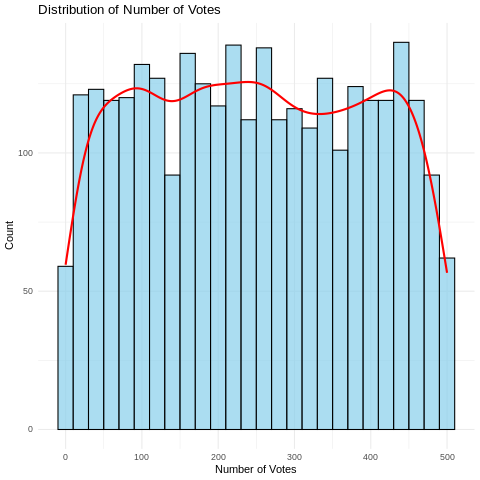

In [98]:
%%R
# 1. Histogram of Number of Votes distribution
ggplot(data, aes(x = `Number of Votes`)) +
  geom_histogram(binwidth = 20, fill = "skyblue", color = "black", alpha = 0.7) +
  geom_density(aes(y = 20 * after_stat(count)), color = "red", linewidth = 1) +  # updated syntax
  labs(title = "Distribution of Number of Votes",
       x = "Number of Votes",
       y = "Count") +
  theme_minimal()

## 5.2  Bar Plot (Count of Ideas by Vote Category)

**Significance:**
* This plot shows the distribution of ideas based on how many votes they received (categorized as High, Medium, Low). It helps to quickly identify which categories have the most ideas and understand overall voting trends. This can highlight where most employee or stakeholder engagement is happening and indicate which ideas have more support.

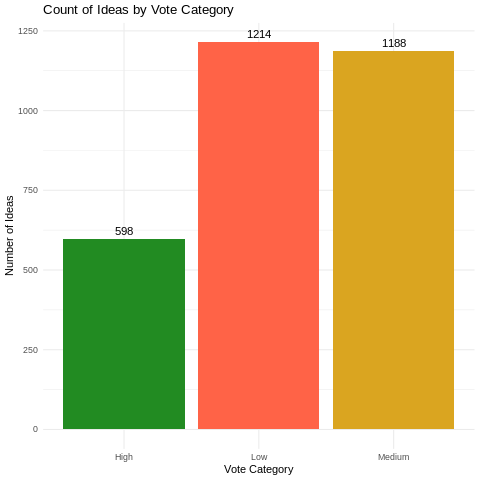

In [96]:
%%R

# Calculate counts per Vote_Category for labels
vote_counts <- data %>%
  count(Vote_Category)

# 2. Bar plot of count of ideas by Vote_Category
ggplot(data, aes(x = Vote_Category, fill = Vote_Category)) +
  geom_bar() +
  geom_text(data = vote_counts, aes(x = Vote_Category, y = n, label = n),
            vjust = -0.5, size = 4) +
  labs(title = "Count of Ideas by Vote Category",
       x = "Vote Category",
       y = "Number of Ideas") +
  scale_fill_manual(values = c("High" = "forestgreen", "Medium" = "goldenrod", "Low" = "tomato")) +
  theme_minimal() +
  theme(legend.position = "none")

## 5.3 Boxplot (Votes by Approval Status)

**Significance:**
* The boxplot visualizes the spread and range of votes for ideas grouped by their approval status (e.g., Approved, Pending, Rejected). It helps detect differences in voting patterns between approved and non-approved ideas, revealing if higher votes correlate with approvals. Outliers or unusual vote distributions can also be spotted, which might need further investigation.

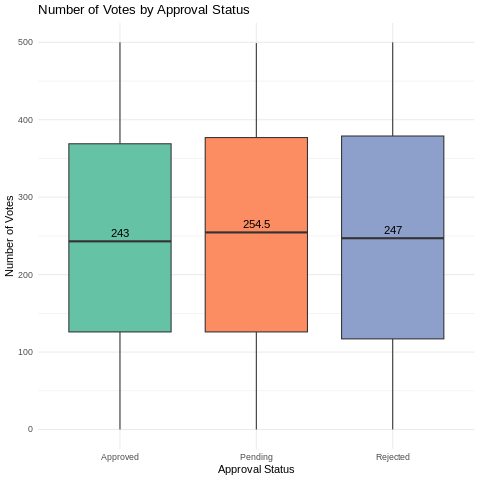

In [93]:
%%R

# Calculate median votes by Approval Status
medians <- data %>%
  group_by(`Approval Status`) %>%
  summarise(median_votes = median(`Number of Votes`))

# 3. Boxplot of Number of Votes by Approval Status
ggplot(data, aes(x = `Approval Status`, y = `Number of Votes`, fill = `Approval Status`)) +
  geom_boxplot() +
  geom_text(data = medians, aes(x = `Approval Status`, y = median_votes, label = median_votes),
            vjust = -0.5, color = "black", size = 4) +
  labs(title = "Number of Votes by Approval Status",
       x = "Approval Status",
       y = "Number of Votes") +
  scale_fill_brewer(palette = "Set2") +
  theme_minimal() +
  theme(legend.position = "none")

## 5.4 Pie Chart (Collaboration Status Distribution)

**Significance:**

*   This pie chart shows the proportion of ideas submitted under different collaboration statuses (e.g., Individual, Team, Cross-Regional). It provides an intuitive visual to understand how collaborative the innovation process is, emphasizing the extent of teamwork versus solo efforts. This insight can help the organization assess the effectiveness of their collaboration policies and identify areas to encourage more teamwork.


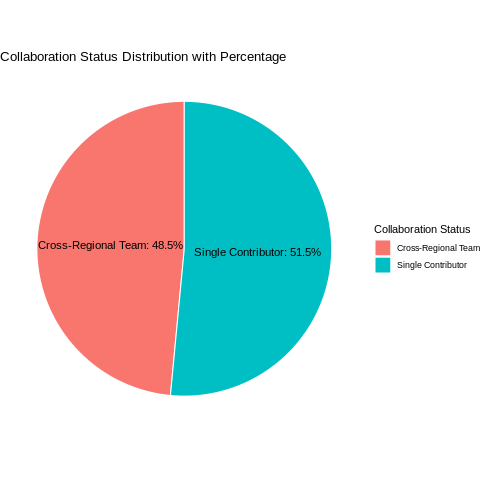

In [94]:
%%R

# Calculate counts and percentages
collab_data <- data %>%
  count(`Collaboration Status`) %>%
  mutate(Percentage = round(100 * n / sum(n), 1),
         Label = paste0(`Collaboration Status`, ": ", Percentage, "%"))


# Plot 4: Pie chart of Collaboration Status distribution
# Assuming column is 'Collaboration Status'
ggplot(collab_data, aes(x = "", y = n, fill = `Collaboration Status`)) +
  geom_bar(stat = "identity", width = 1, color = "white") +
  coord_polar("y") +
  theme_void() +
  geom_text(aes(label = Label),
            position = position_stack(vjust = 0.5), size = 4) +
  labs(title = "Collaboration Status Distribution with Percentage")